# David Böhler, Nico Knünz, Julian Mathis

# K-Means Clustering Exercises

### Exercise 1: Compute the centroid of a list of points

* Implement a python function that computes the centroid of an array of points.
* Visualize the points and the centroid using matplotlib (```plt.scatter()```could be helpful).

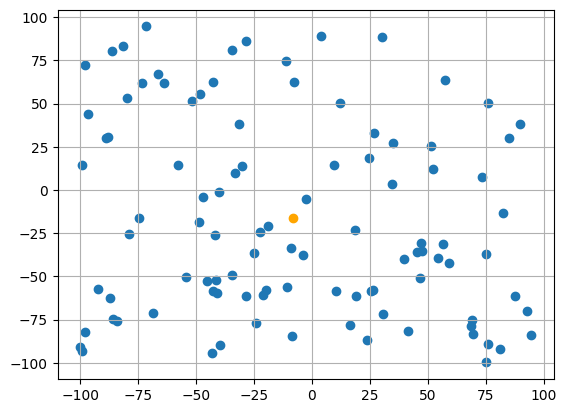

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random points
#
std = 100
mean = 0

X = mean + np.random.uniform(-1, 1, size=(100, 2)) * std
plt.scatter(X[:,0], X[:,1])
c = center_mean(X)
plt.plot(c[0], c[1], 'o', color="ORANGE")
plt.grid(True)

In [ ]:
def center(X):
  x = 0
  y = 0
  for point in X:
    x += point[0]
    y += point[1]

  x = x / len(X)
  y = y / len(X)
  return [x,y]

def center_mean(X):
  if(X.shape[0] == 0):
    print("warning")
  x = np.mean(X, axis = 0)[0]
  y = np.mean(X, axis = 0)[1]
  return [x,y]

### Exercise 2: Implement the k-means Algorithm

* Implement the k-means algorithm, use X as your test data.
* Use the ```plot_clusters()``` to visualize your results.
* What happens when you run the clustering multiple times, how do the results change?


*Hints:*
* Use the ```np.random.choice()```function to select the indices to initialize the cluster centroids (use the ```replace=False``` parameter)
* You can initialize an empty numpy array using the ```np.zeros()``` function.
* The ```np.argmin()``` function can be used to find the index of the smallest value in a numpy array.
* Logical indexing can be very helpful here ```X[Y == 1, :]``` selects all vectors with a cluster label of 1.

**Use the follwing method stub:**
```python
def kmeans(X, k):
    """ Perform k-means clustering of data X into k partitions.
    
    Parameters
    ----------
    X: np.array
        A numpy array of feature vectors.

    Returns
    ----------
    A one-dimensional numpy array containing the assigned cluster indices for each vector in X.
```

## Anwser: What happens when you run the clustering multiple times, how do the results change?

Since the first centers a chosen randomly, the result can change with each new iteration. First centers random means that it is non-deterministic and therefore can have different results with each execution

In [ ]:
# Use this function to plot your results. Notice: Only 2-dimensional features are supported.
#
def plot_clusters(X:np.array, Y):
    assert X.shape[1] == 2, 'Can only plot for 2-dimensional vectors in X'

    for k in np.unique(Y):
        plt.scatter(X[Y == k, 0], X[Y == k, 1])

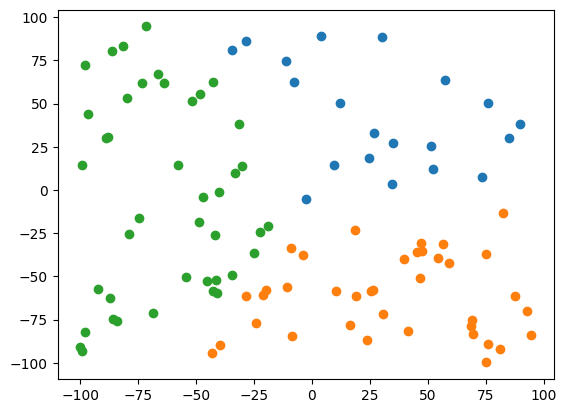

In [ ]:
def kmeans(X, k):
  start = np.random.choice(X.shape[0], k, replace = False)
  #print(X)
  centers = X[start,:]
  #print(centers)
  Y = np.zeros( X.shape[0], dtype = int)
  newY = np.zeros( X.shape[0], dtype = int)
  while True:
    #iterate all point to calculate k-index
    for j in range(X.shape[0]):
      distance = np.zeros( k, dtype = float)
      for i in range(k):
        #distance vector
        vector = np.subtract(X[j],centers[i])
        #calculate distance to center point
        distance[i] = pow(vector[0], 2) + pow(vector[1], 2)
      #take index of lowest distance
      newY[j] = np.argmin(distance, axis=0)
    # if indexes did not change return;
    if ((Y==newY).all()):
      return newY;
    # else calculate new centers of cluster then
    for i in range(k):
      centers[i] = center_mean(X[newY == i, :])
    Y = np.array(newY)

plot_clusters(X,kmeans(X,3))


### Exercise 3: k-means in scikit-learn

* Use the scikit-learn implementation of k-means to cluster X and compare the results to your implementation.

## Answer Compare

It seems that every execution yields the same result and that the scikit version has a deterministic approach in comparision to our non-deterministic approach

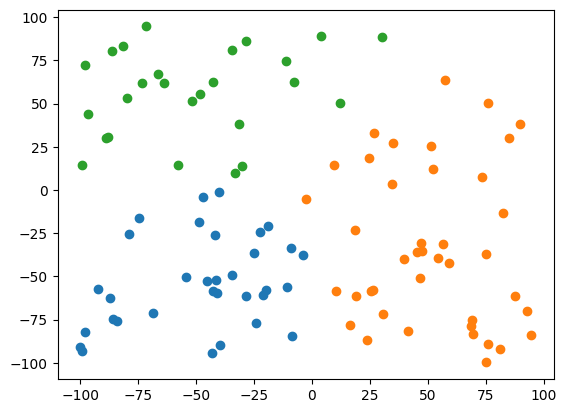

In [ ]:
from sklearn.cluster import KMeans
sk_kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
plot_clusters(X,sk_kmeans.labels_)
#always has the same result, mine is random depending on starting centers

### Exercise 4: Silhouette

Use the ```silhouette_score()``` function in scikit-learn to determine the best number of cluster. Interpret and plot the results. To do so, perform kmeans clustering (use either scikit-learn or your own implementation) within a range of
clusters (2,k) and compute the silhouette score for your result. Print all silhouette scores and plot the clustering with the highest silhouette score.

* Use the ```silhouette_score()``` function in scikit-learn to determine the best number of clusters.
* Interpret and plot the results.
* Compare the silhouette score of a random clustering (use ```random_labels=True```  parameter) to a meaningful clustering.

## Answers:
Interpretion

For a low number of clusters n which are more or less differenciated it often gets the best number of cluster k with k = n. however with more clusters and some overlapping between the clusters the score is often close to (k is close to n). Sometimes it can also be a number for k that is not really close to n, this is due the overlapping of the n clusters.

Random Label Score vs meaningful Score

The sil. score of a random clustering with all labels randomly assigned it results in a really low score which can be negative due its randomness.


In [ ]:
# Generate data from k distinct clusters
#
def gen_data(k = 2, random_labels = False):
    X = []
    Y = []

    for i in range(k):
        std = np.random.randn()
        mean = np.random.randn() + i

        tmp = mean + np.random.uniform(-1, 1, size=(50, 2)) * std
        X.append(tmp)
        Y.append(np.ones(50) * i)

    Y = np.array(Y).ravel()
    if random_labels:
        np.random.shuffle(Y)

    return np.array(X).reshape(k * 50, 2), Y

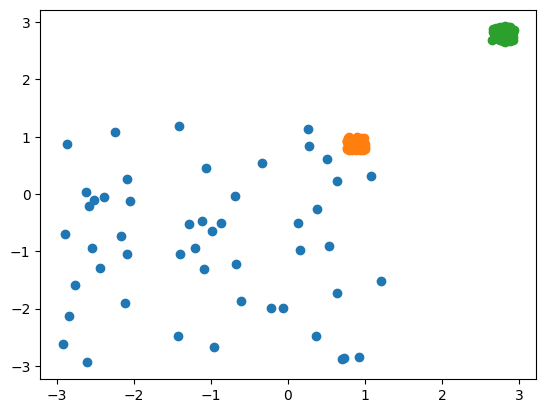

In [ ]:
n_clusters = 3
X2, Y2 = gen_data(n_clusters, random_labels=False)
plot_clusters(X2, Y2)

clusters 2:
0.6453679574237654
clusters 3:
0.7358814309828636
clusters 4:
0.7625272183749103
clusters 5:
0.7592849151788271
clusters 6:
0.7574836543044408
clusters 7:
0.7471612930583954
clusters 8:
0.7359174431682887
clusters 9:
0.7039214853209411
clusters 10:
0.7093975741984428

score with real labels
0.681682212289271
best score plot


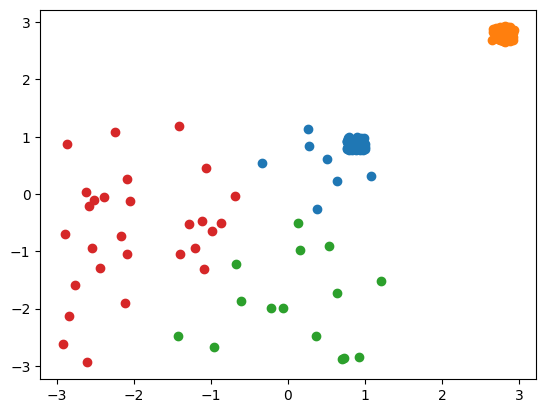

In [ ]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import sys
k = 10
best_value = -sys.maxsize - 1
for i in range(2,k+1):
  #calculate clusters and then score and check if it is the best
  sk_kmeans = KMeans(n_clusters=i, random_state=1).fit(X2)
  score = metrics.silhouette_score(X2, sk_kmeans.labels_, metric = "euclidean")
  if (score > best_value):
    best_value = score
    best_labels = sk_kmeans.labels_
  print(f"clusters {i}:")
  print(score)
print("")
print("score with real labels")
print(metrics.silhouette_score(X2, Y2, metric = "euclidean"))
# for the random the score ist almost always negative, trough the randomness of the "clusters"

print("best score plot")
plot_clusters(X2,best_labels)

# the number of clustering is heavily influenced by the spread of the given clusters, if the spread into each other,
# then the clusters "merge" and reduce the number if clusters for the better score
# and if the spread to far the number if cluster increases


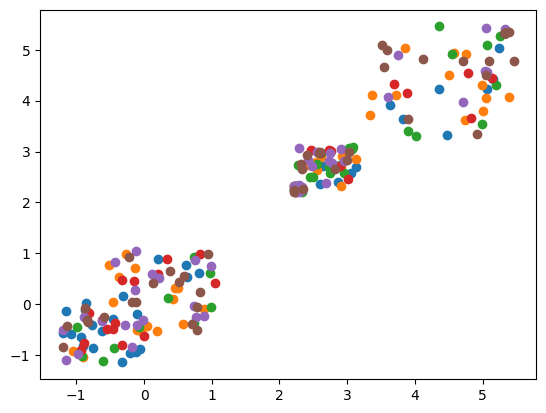

In [ ]:
n_clusters = 6
X2, Y2 = gen_data(n_clusters, random_labels=True)
plot_clusters(X2, Y2)


clusters 2:
0.5903872053124012
clusters 3:
0.7349688827443107
clusters 4:
0.6644648964137975
clusters 5:
0.6413346623175487
clusters 6:
0.5952823421314631
clusters 7:
0.5613905863134546
clusters 8:
0.5928147195463945
clusters 9:
0.5843511596541879
clusters 10:
0.5938304089145358
if random labels True, value of given labels
-0.12676747068082728
best score plot


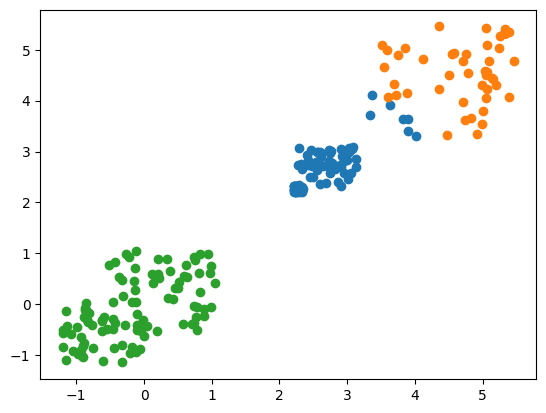

In [ ]:
##for Random = True
k = 10
best_value = -sys.maxsize - 1
for i in range(2,k+1):
  sk_kmeans = KMeans(n_clusters=i, random_state=1).fit(X2)
  score = metrics.silhouette_score(X2, sk_kmeans.labels_, metric = "euclidean")
  if (score > best_value):
    best_value = score
    best_labels = sk_kmeans.labels_
  print(f"clusters {i}:")
  print(score)
# for random = True
print("if random labels True, value of given labels")
print(metrics.silhouette_score(X2, Y2, metric = "euclidean"))
# for the random the score ist almost always negative, trough the randomness of the "clusters"

print("best score plot")
plot_clusters(X2,best_labels)